In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
file1 = open('/content/gdrive/MyDrive/projectfolder/largetext.txt','r')
file2 = open('/content/gdrive/MyDrive/projectfolder/CharlotteMar2_2020.txt','r')
file3 = open('/content/gdrive/MyDrive/projectfolder/CharlestonFeb28_2020.txt','r')

manual_file1 = open("/content/gdrive/MyDrive/projectfolder/manual_keywords2.txt",'r')
manual_file2 = open("/content/gdrive/MyDrive/projectfolder/manual_keywords3.txt",'r')
manual_file3 = open("/content/gdrive/MyDrive/projectfolder/manual_keywords1.txt",'r')

In [ ]:
pip install rake-nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize 
import math
import operator
from rake_nltk import Rake
from matplotlib import pyplot as plt  
import random
import time
r = Rake()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def main(file,manual_file):
  doc1 = file.read()
  data_manual = manual_file.read()
  manual_phrases = data_manual.split("\n")
  manual_content_words = []
  for i in manual_phrases:
    w = i.split(" ")
    for j in w:
      if j not in manual_content_words:
        manual_content_words.append(j)
  doc=""
  for i in doc1:
    if i.isalpha():
      i=i.lower()
      doc+=i
    else:
      doc+=i

  rake_content_words = []
  def rake_algorithm(data):
    r = Rake()
    r.extract_keywords_from_text(data)
    y=r.get_ranked_phrases()
    t=r.get_ranked_phrases_with_scores()
    for i in y:
      w = i.split(" ")
      for j in w:
        if j not in rake_content_words:
          rake_content_words.append(j)
  rake_algorithm(doc)

  CF_content_words=[]
  def bow(data):
    def unique(sequence):
        seen = set()
        return [x for x in sequence if not (x in seen or seen.add(x))]
    #create a list of stopwords.You can import stopwords from nltk too
    stopwords=stop_words
    #list of special characters.You can use regular expressions too
    special_char=[",",":"," ",";",".","?"]
    #Write the sentences in the corpus,in our case, just two 
    strings = sent_tokenize(data)
    tokens=[]
    for i in strings:
      string = i.lower()
      token = string.split()
      tokens.append(token)
    #create a vocabulary list
    tok=[]
    for i in tokens:
      tok+=i
    vocab=unique(tok)
    #filter the vocabulary list
    for w in vocab: 
        if w not in stopwords and w not in special_char: 
            bow_content_words.append(w)
  bow(doc)
  similar_words_rake = []
  similar_words_bow=[]

  for i in bow_content_words:
    for j in manual_content_words:
      if i==j:
        if i not in similar_words_bow:
          similar_words_bow.append(i)
  for i in rake_content_words:
    for j in manual_content_words:
      if i==j:
        if i not in similar_words_rake:
          similar_words_rake.append(i)
  rake_similar = (len(similar_words_rake)/len(manual_content_words))*100
  bow_similar = (len(similar_words_bow)/len(manual_content_words))*100
  return [bow_similar,rake_similar]


In [ ]:
res3 = main(file1,manual_file1)
print(res3)

[88.33333333333333, 99.16666666666667]


In [ ]:
res1 = main(file2,manual_file2)
print(res1)

[60.54216867469879, 69.57831325301204]


In [ ]:
res2 = main(file3,manual_file3)
print(res2)

[83.09859154929578, 88.73239436619718]


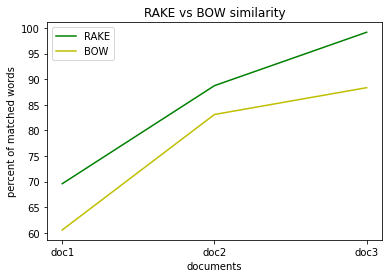

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x=["doc1","doc2","doc3"]
y1 = [res1[0],res2[0],res3[0]]
y2 = [res1[1],res2[1],res3[1]]
plt.plot(x, y2,label="RAKE", color='g')
plt.plot(x, y1,label="BOW", color='y')
plt.xlabel("documents")
plt.ylabel("percent of matched words")
plt.title('RAKE vs BOW similarity') 
plt.legend(loc='upper left')
plt.show();